In [4]:
!nvidia-smi

Wed Jun  9 16:44:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
from __future__ import print_function
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

In [6]:
# hyper parameter
num_of_epoch = 20
batch_size = 128
num_classs = 10

In [7]:
#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
print(len(X_train),' sample training')
print(len(X_test),' sample test')

60000  sample training
10000  sample test


In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize (0-1)
X_train /=255
X_test /=255


In [11]:
# one hot y
print(y_train[0])
Y_test = np_utils.to_categorical(y_test, num_classs)
Y_train = np_utils.to_categorical(y_train, num_classs)
Y_train[0]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [38]:
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classs, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_26 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=SGD(),
              metrics = ['accuracy'])

In [40]:
H = model.fit(X_train, Y_train, batch_size=64, epochs=30,
          verbose=1,validation_data=(X_test, Y_test))

Epoch 1/30
938/938 [==============================] - 3s 3ms/step - loss: 1.3395 - accuracy: 0.6332 - val_loss: 0.3929 - val_accuracy: 0.8937
Epoch 2/30
938/938 [==============================] - 2s 3ms/step - loss: 0.3733 - accuracy: 0.8995 - val_loss: 0.2957 - val_accuracy: 0.9186
Epoch 3/30
938/938 [==============================] - 2s 3ms/step - loss: 0.3003 - accuracy: 0.9161 - val_loss: 0.2605 - val_accuracy: 0.9265
Epoch 4/30
938/938 [==============================] - 2s 3ms/step - loss: 0.2555 - accuracy: 0.9275 - val_loss: 0.2341 - val_accuracy: 0.9332
Epoch 5/30
938/938 [==============================] - 2s 3ms/step - loss: 0.2344 - accuracy: 0.9336 - val_loss: 0.2117 - val_accuracy: 0.9405
Epoch 6/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2117 - accuracy: 0.9403 - val_loss: 0.1970 - val_accuracy: 0.9428
Epoch 7/30
938/938 [==============================] - 2s 3ms/step - loss: 0.1959 - accuracy: 0.9451 - val_loss: 0.1801 - val_accuracy: 0.9471
Epoch 

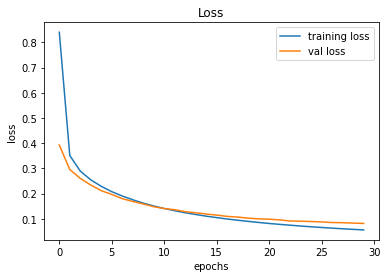

In [41]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.plot(np.arange(0,30), H.history['loss'], label='training loss')
plt.plot(np.arange(0,30), H.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

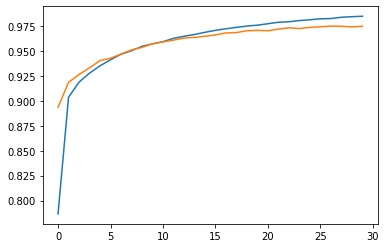

In [42]:
plt.plot(np.arange(0,30), H.history['accuracy'], label='accuracy train')
plt.plot(np.arange(0,30), H.history['val_accuracy'], label='accuracy val')

In [15]:
score = model.evaluate(X_test, Y_test,verbose=0)
print('Loss test ',score[0])
print('Accuracy test ',score[1])

Loss test  0.08398833125829697
Accuracy test  0.9724000096321106


Giá trị dự đoán:  2


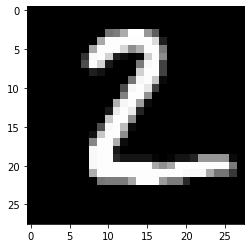

In [48]:
#Dự đoán ảnh
plt.imshow(X_test[1].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[1].reshape(1,784,))
print('Giá trị dự đoán: ', np.argmax(y_predict))

In [29]:
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classs, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=Adam(),
              metrics = ['accuracy'])

In [31]:
H = model.fit(X_train, Y_train, batch_size=64, epochs=10,
          verbose=1,validation_data=(X_test, Y_test))

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.4318 - accuracy: 0.8705 - val_loss: 0.1104 - val_accuracy: 0.9668
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0916 - accuracy: 0.9712 - val_loss: 0.0878 - val_accuracy: 0.9730
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0541 - accuracy: 0.9830 - val_loss: 0.0782 - val_accuracy: 0.9754
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0418 - accuracy: 0.9867 - val_loss: 0.0727 - val_accuracy: 0.9783
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0864 - val_accuracy: 0.9761
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0726 - val_accuracy: 0.9793
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0696 - val_accuracy: 0.9784
Epoch 

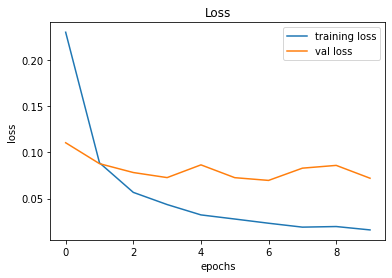

In [36]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.plot(np.arange(0,10), H.history['loss'], label='training loss')
plt.plot(np.arange(0,10), H.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

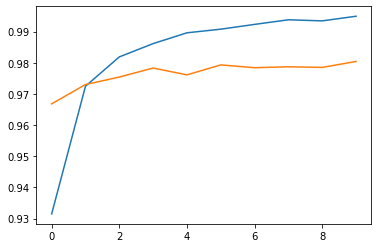

In [37]:
plt.plot(np.arange(0,10), H.history['accuracy'], label='accuracy train')
plt.plot(np.arange(0,10), H.history['val_accuracy'], label='accuracy val')